#  AZP algorithm

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append("../")

In [3]:
from spopt import AZP
import geopandas as gpd
import libpysal
import numpy as np

#### Mexican State Regional Income Clustering
Cluster 32 Mexican states into 8 regions using AZP algorithm (Openshaw, S. and Rao, L. (1995)).

<AxesSubplot:>

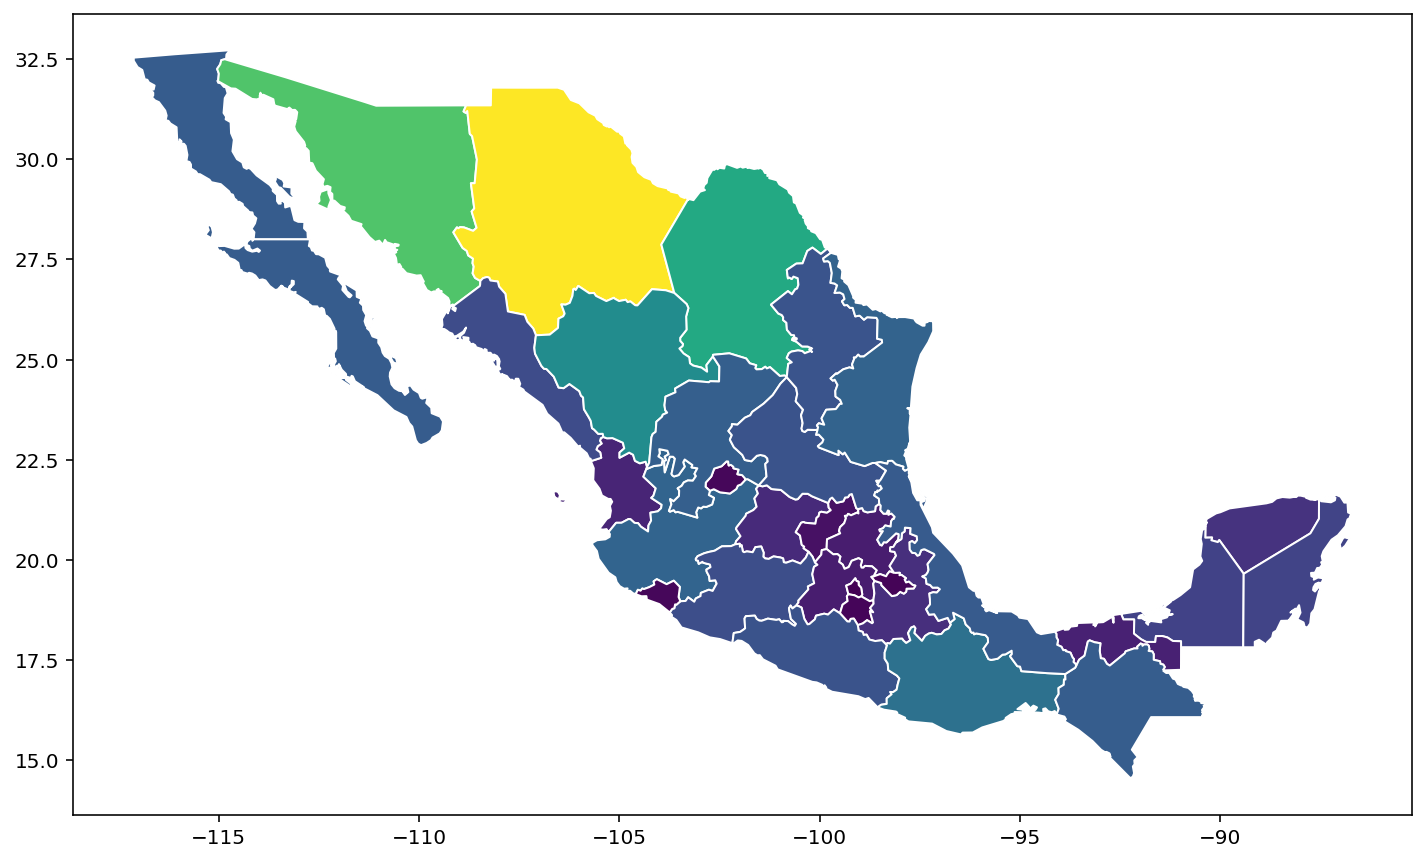

In [4]:
pth = libpysal.examples.get_path('mexicojoin.shp')
mexico = gpd.read_file(pth)
mexico.plot(column='AREA', figsize=(12,8), edgecolor='w')

In [5]:
attrs_name = [f'PCGDP{year}' for year in range(1950,2010, 10)]
w = libpysal.weights.Queen.from_dataframe(mexico)
n_clusters = 8
allow_move_strategy = None
random_state = 12345

In [6]:
model = AZP(mexico, w, attrs_name, n_clusters, allow_move_strategy, random_state)
model.solve()
mexico['azp_new'] = model.labels_

n_regions_per_comp {0: 8}
comp_label 0
n_regions_in_comp 8
Regions in comp: {0, 1, 2, 3, 4, 5, 6, 7}


<AxesSubplot:>

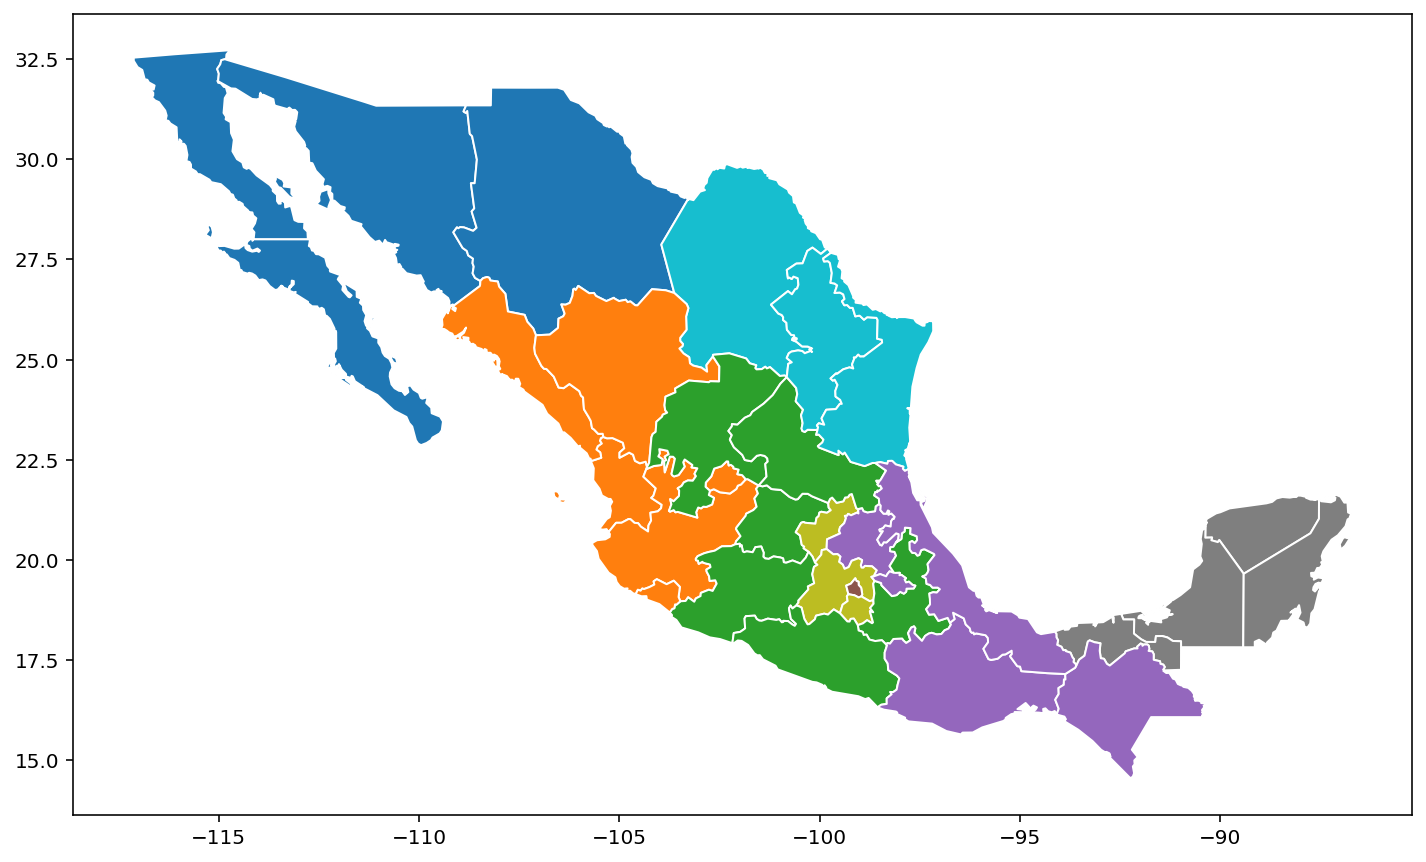

In [7]:
mexico.plot(column='azp_new', categorical=True, figsize=(12,8), edgecolor='w')